로지스틱 회귀

In [ ]:
# 한빛 럭키백 이벤트 #

# 구성품을 모른 채 먼제 구매하고, 배송받은 다음에야 비로소 구성품을 알 수 있는 상품 (생선으로 한정)
# 럭키백에 포함된 생선의 확률을 알려주는 방향으로 이벤트 진행
#     >> 만약 A 럭키백에 도미 확률이 높다고 표시하면 도미를 원한 고객은 A 럭키백을 구매할 것

# 럭키백에 들어갈 수 잇는 생선은 7개
# 럭키백에 들어간 생선의 크기, 무게 등이 주어졌을 때 7개 생선에 대한 확률 출력

# 길이, 높이, 두께, 대각선길이, 무게 가 주어짐

In [ ]:
# 1번째 시도. k-최근접 이웃 > 이웃의 클래스 비율을 확률로

In [1]:
# 데이터 read
import pandas as pd 
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 판다스의 unique() 함수를 이용하여 어떤 종류가 있는지 출력
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [8]:
# 데이터 프레임에서 열을 선택하서 numpy로 바꾸어 저장하는 방법
import numpy as np

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [9]:
fish_target = fish['Species'].to_numpy()

In [10]:
# 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target,
                                                                random_state=42)

# 표준화 전처리

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)

In [11]:
# k-최근접 이웃 분류 클래스를 이용하여 최근접 이웃 개수 k를 3으로 지정하여 사용

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.875


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

##### 다중분류
- fish_target에는 7개의 생선이 들어있음. 타깃 데이터에 2개 이상의 클래스가 포함된 문제
- 이진 분류와 모델을 만들고 훈련하는 방식은 동일
- 이진 분류시 양성 클래스와 음성 클래스로 각각 1, 0으로 지정하여 타깃 데이터 만듦
- 다중 분류에서도 타깃값을 숫자로 바꾸어 입력할 수 있지만
- 사이킷런에서는 문자열로 된 타깃값 그대로 사용 가능.

In [12]:
# 주의할 점 #

# 타깃값을 그대로 사이킷런 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨짐.
# 따라서 pd.unique(fish['Species'])로 출력했던 순서와 다름.

# KNeighborsClassifier에서 정렬된 타깃값은 classes_ 속성에 저장되어 있음.
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
# 테스트 세트 처음 5개로 타깃값 예측해보기
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
# 샘플에 대한 예측 확률
# 사이킷런 분류 모델 predict_proba() 메서드로 클래스별 확률값 반환
### 넘파이 round() 함수는 기본으로 소수점 첫째 자리에서 반올림. 
#   decimals 매개변수로 유지할 소수점 아래 자릿수 지정 가능

In [15]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.     0.6667 0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [16]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해보기.
# 4번째 샘플의 최근접 이웃 클래스 확인

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]

[['Perch' 'Roach' 'Perch']]


로지스틱 회귀(logistic regression)

- 이름은 회귀이지만 분류 모델 
- 선형회귀와 동일하게 선형 방정식을 학습함.
- ```z = a * (Weight)  + b * (Length) + c x (Diagonal) + d x (Height) + e x (Width) + f```
- a, b, c, d, e == 가중치(계수)
- 특성은 늘어났지만 다중 회귀를 위한 선형 방정식과 같음.
- z는 어떤 값도 가능하지만 확률이 되려면 0 ~ 1, 또는 0 ~ 100(%) 사이 값이 되어야 함.

시그모이드 함수 (sigmoid function) (로지스틱 함수<logistic function>)
- z 가 아주 큰 음수일 때 0이 되고 , z가 아주 큰 양수일 때 1이 되도록 바꾸는 방법

- z 가 무한하게 큰 음수일 경우 함수는 0에 가까워지고
- z 가 무한하게 큰 양수일 경우 함수는 1에 가까워짐.
- z 가 0이 될 때는 0.5가 됨.  >> z가 어떤 값이 되더라도 0~1사이 안의 값이 됨.

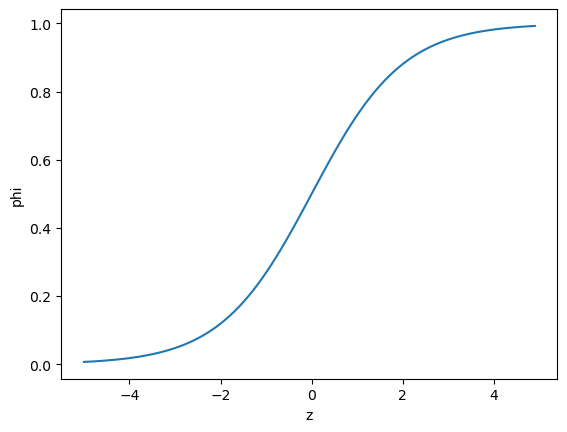

In [18]:
# numpy 사용하여 그래프 그리기

import numpy as np 
import matplotlib.pyplot as plt 
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# 지수함수 계산 = np.exp() 함수 사용

In [ ]:
# 도미와 빙어를 사용해서 이진 분류 우선 수행해보기

# 로지스틱 회귀로 이진 분류 수행


In [20]:
# 넘파이는 True, False 값을 전달하여 행을 선택할 수 있음 == 불리언 인덱싱(boolean indexing)

# 'A'에서 'E'까지 5개의 원소로 이루어진 배열에서 'A'와 'C'만 골라내려면 
# 첫 번째와 세번째 원소만 True이고 나머지 원소는 모두  False인 배열을 전달하면 됨.

charr_arr = np.array(['A','B','C','D','E'])
print(charr_arr[[True, False, True, False, False]])


['A' 'C']


In [21]:
# 위와 같은 방식으로 훈련 세트에서 도미(Bream)과 빙어(Smelt)만 골라내기
# 비교연산자 사용

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [22]:
# 로지스틱 회귀 모델 훈련하기 선형 모델 패키기 아래 있음

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [24]:
# 훈련한 모델을 이용하여 train_bream_smelt에 있는 처음 다섯개 샘플 예측하기

print(lr.predict(train_bream_smelt[:5]))
# 두 번째 샘플 제외하고 모두 도미(Bream)으로 예측

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [25]:
# 예측 확률은 KNeighborsClassifier과 마찬가지로 predict_proba() 메서드에서 제공
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [26]:
# classes_확인
print(lr.classes_)

['Bream' 'Smelt']


In [27]:
# 로지스틱 회귀가 학습한 계수 확인
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# 로지스틱 회귀의 방정식은
z = -0.404*(Weight) -0.576*(Length) -0.662*(Diagonal) -1.012*(Height) -0.732*(Width) -2.161

In [28]:
# 로지스틱 모델로 z값 계산하기
# LogisticRegression class는 decision_function() 메서드로 z 값을 출력할 수 있음.

# train_bream_smelt의 처음 5개 샘플의 z값 출력하기

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [29]:
# 구해진 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
# 파이썬 사이파이 scipy 라이브러리 = expit() 시그모이드 함수
# np.exp()함수를 사용해 분수계산을 하는 것보다 편리하고 안전

# decisions 배열의 값을 확률로 변환
from scipy.special import expit
print(expit(decisions))

# predict_proba() 메서드의 출력의 두번쨰 열의 값과 동일.

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


로지스틱 회귀로 다중 분류 수행하기

In [ ]:
# LogisticRegression은 기본적으로 반복적인 알고리즘 사용.
#   max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100

#   여기에 준비한 데이터셋을 사용해 모델을 훈련하면 반복 횟수가 부족하다는 경고 발생 >> 반복횟수 1000으로 늘림

#   LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제함. 
#   ** L2 규제 = 계수의 제곱을 규제하는 것.
#   ** 릿지 회귀 규제 매개변수 == alpha
#   ** LogisticRegression 규제 매개변수 == C , 기본값 == 1  >>> 규제 완화를 위해 20으로 늘림

In [33]:
#  LogisticRegression 클래스로 다중 분류 모델을 훈련하는 코드
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [34]:
# 테스트 세트 처음 5개 샘플 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [35]:
# 테스트 세트 처음 5새 샘플에 대한 확률
print(lr.predict_proba(test_scaled[:5]))

[[1.15680202e-05 1.29286759e-02 8.01951840e-01 2.65016957e-04
  1.77521049e-01 3.09331615e-03 4.22853443e-03]
 [1.27304280e-07 2.07007870e-02 1.48138849e-01 8.50714992e-05
  5.44391542e-02 7.76560529e-01 7.54818963e-05]
 [3.10136813e-05 3.39537439e-06 4.93150106e-02 9.19079738e-01
  2.14173406e-02 1.00959000e-02 5.76013633e-05]
 [4.84093127e-03 1.21519840e-02 3.99853682e-01 6.74414552e-03
  5.15786270e-01 6.24430486e-05 6.05605444e-02]
 [7.65771794e-06 4.04809442e-04 8.79403618e-01 2.17312051e-03
  1.14550508e-01 1.31947482e-03 2.14081128e-03]]


In [38]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.013 0.802 0.    0.178 0.003 0.004]
 [0.    0.021 0.148 0.    0.054 0.777 0.   ]
 [0.    0.    0.049 0.919 0.021 0.01  0.   ]
 [0.005 0.012 0.4   0.007 0.516 0.    0.061]
 [0.    0.    0.879 0.002 0.115 0.001 0.002]]


In [39]:
# 각 열 정보
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [40]:
# 다중 분류의 선형 방정식

# coef_, intercept_ 크기 출력
print(lr.coef_.shape, lr.intercept_.shape)
# 다섯개의 특성을 사용함.
# 7행의 의미 = 7개의 z를 계산한다는 뜻. > 가장 높은 z값을 출력하는 클래스가 예측 클래스가 됨.

(7, 5) (7,)


In [ ]:
# 확률 계산 방법
# 이진 분류에서는 시그모이드 함수를 이용해 z를 0과 1사이의 값으로 변환함.
# 다중 분류는 ** 소프트 맥스(softmax) ** 함수를 사용하여 7개의 z 값을 확률로 반환



## 소프트 맥스 함수란??

# 여러 개의 선형 방정식의 출력값을 0~1사이로 압축하고 전체 합이 1이 되도록 만듦.
# 이를 위해 지수 함수를 사용하기 떄문에 ** 정규화된 지수함수 ** 라고도 부름

In [ ]:
# 소프트 맥스 함수 계산 법

# 각 z를 z1~z7이라고 할때 , e^z1 ~ e^z7을 모두 더하고 이를 == e_sum
# 각 e^z1 ~ e^z7를 e_sum으로 나누어 주면 됨.== s1 ~ s7

# s1 ~ s7 값을 모두 더하면 분자와 분모가 같아지므로 1이 됨. 
# >> 7개 생선에 대한 확률의 합이 1이 되어야 함.

In [41]:
# decision_function() 메서드로 z1~ z7값 구한 다음 소프트맥스 함수를 사용해 확률로 바꾸기

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[-6.06  0.96  5.09 -2.93  3.58 -0.47 -0.16]
 [-9.64  2.36  4.33 -3.13  3.33  5.99 -3.25]
 [-4.06 -6.27  3.31  6.24  2.48  1.73 -3.44]
 [-1.22 -0.3   3.2  -0.88  3.45 -5.57  1.31]
 [-5.95 -1.98  5.7  -0.3   3.66 -0.8  -0.32]]


In [43]:
# decision배열을 softmax() 함수에 전달.
# softmax()의 axis= 매개변수는 소프트 맥스를 계산할 축을 지정.

from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba, decimals=3))

[[0.    0.013 0.802 0.    0.178 0.003 0.004]
 [0.    0.021 0.148 0.    0.054 0.777 0.   ]
 [0.    0.    0.049 0.919 0.021 0.01  0.   ]
 [0.005 0.012 0.4   0.007 0.516 0.    0.061]
 [0.    0.    0.879 0.002 0.115 0.001 0.002]]


전체 코드 실행해보기

In [44]:
# 데이터 불러오기
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [46]:
# 생선 종류 불러오기
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [47]:
# 종류를 타깃으로 만들고 나머지 값을 train 만드는 배열 생성

fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [48]:
# 데이터 나누기

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target)

In [49]:
# 나눈 데이터 표준화 전처리 해주기.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)

In [51]:
# k-최근접 이웃 분류로 확률 예측하기
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
print(kn.predict(test_scaled[:5]))
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

0.865546218487395
0.8
['Smelt' 'Bream' 'Whitefish' 'Pike' 'Perch']
[[0.     0.     0.     0.     0.     1.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.     0.     0.6667]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]]


c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [ ]:
#  로지스틱 회귀 이용하기

In [52]:
# 이중 로지스틱 회귀.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']
[[0.99727765 0.00272235]
 [0.99473817 0.00526183]
 [0.96333262 0.03666738]
 [0.95106712 0.04893288]
 [0.99527762 0.00472238]]
['Bream' 'Smelt']


In [54]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

# z값

[-5.90353399 -5.24200023 -3.26851114 -2.96713517 -5.35070776]


In [55]:
# expit함수에 넣기

from scipy.special import expit
print(expit(decision))

[[2.32704357e-03 7.22747591e-01 9.93853656e-01 5.07251027e-02
  9.72821467e-01 3.84125864e-01 4.60219112e-01]
 [6.53880744e-05 9.14040363e-01 9.87028896e-01 4.18690307e-02
  9.65474076e-01 9.97499347e-01 3.73255479e-02]
 [1.70081855e-02 1.89069092e-03 9.64927962e-01 9.98053538e-01
  9.22772113e-01 8.49226878e-01 3.11351336e-02]
 [2.28679971e-01 4.26683715e-01 9.60766926e-01 2.92305675e-01
  9.69314697e-01 3.80970202e-03 7.87639741e-01]
 [2.59434983e-03 1.20880413e-01 9.96663409e-01 4.24673711e-01
  9.74943237e-01 3.09481047e-01 4.21018073e-01]]


In [ ]:
# 다중 로지스틱 회귀 분류 수행

In [56]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

print(lr.classes_)

0.9243697478991597
0.8
['Smelt' 'Bream' 'Roach' 'Pike' 'Perch']
[[0.    0.001 0.157 0.    0.02  0.821 0.   ]
 [0.989 0.01  0.    0.    0.    0.    0.001]
 [0.009 0.015 0.214 0.027 0.597 0.001 0.137]
 [0.    0.    0.004 0.995 0.001 0.    0.   ]
 [0.    0.004 0.735 0.005 0.222 0.002 0.032]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [58]:
decisions = lr.decision_function(test_scaled[:5])
print(np.round(decisions, decimals=2)) #z값

[[-11.05  -0.06   4.84  -1.6    2.76   6.49  -1.38]
 [ 12.24   7.62  -6.28  -4.82   2.07 -16.29   5.45]
 [ -1.29  -0.82   1.87  -0.19   2.89  -3.89   1.42]
 [ -2.1   -8.06   2.75   8.33   1.02  -1.02  -0.92]
 [ -4.4   -1.17   4.12  -0.78   2.93  -1.67   0.97]]


In [59]:
from scipy.special import softmax
proba = softmax(decisions, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.001 0.157 0.    0.02  0.821 0.   ]
 [0.989 0.01  0.    0.    0.    0.    0.001]
 [0.009 0.015 0.214 0.027 0.597 0.001 0.137]
 [0.    0.    0.004 0.995 0.001 0.    0.   ]
 [0.    0.004 0.735 0.005 0.222 0.002 0.032]]


In [ ]:
# ** 키워드 핵심 **

# ** 로지스틱 회귀 : 선형 방정식을 사용한 분류 알고리즘
#   선형 회귀와 달리 시그모이드 함수나 소프트 맥스 함수를 사용하여 클래스 확률을 출력할 수 있음.

# ** 다중 분류 : 타깃 클래스가 2개 이상인 분류 문제
#   로지스틱 회귀는 다중 분류를 위해 소프트 맥스 함수를 사용하여 클래스를 예측

# ** 시그모이드 함수 :  선형 방정식의 출력을 0과 1사이의 값으로 압축하며
#   이진 분류를 위해 사용함

# ** 소프트맥스 함수 : 다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만듦

In [ ]:
# ** 패키지 함수 **

# ** scikit-learn
#   * LogisticRegression : 선형 분류 알고리즘인 로지스틱 회귀를 위한 클래스
#    * slover 매개변수에서 사용할 알고리즘을 선택할 수 있음.
#      기본값은 1bfgs..? 
#    * penaly 매개변수에서 L2 규제(릿지 방식)와 L1 규제(라쏘 방식)를 선택할 수 있음.
#      기본값은 L2 규제를 의미하는 l2
#    * C 매개변수에서 규제의 강도 제어 기본값 == 1, 값이 작을 수록 규제가 강해짐

#    * predict_proba() 메서드는 예측 확률 반환
#      이진 분류의 경우에는 샘플마다 음성 클래스와 양성 클래스에 대한 확률 반환
#      다중 분류의 경우에는 샘플마다 모든 클래스에 대한 확률 반환

#    * decision_function() : 모델이 학습한 선형 방정식의 출력 반환
#      이진 분류의 경우 양성 클래스의 확률 반환
#      다중 분류의 경우 각 클래스마다 선형 방정식 계산하여 가장 큰 값의 클래스가 예측 클래스가 됨.

확인 문제

In [ ]:
1. 2개보다 많은 클래스가 있는 분류 문제?

1. 이진 분류 = 2개
2. 다중 분류 = 여러개
3. 단변량 회귀 = 하나의 출력을 예측하는 회귀 문제
4. 다변량 회귀 = 여러 개의 출력을 예측하는 회귀 문제

In [ ]:
2. 로지스틱 회귀가 이진 분류에서 확률을 출력하기 위해 사용하는 함수?

1. 시그모이드 함수 > 선형 방정식의 결과를 0~1 사이의 값으로 압축하여 확률로 해석
2. 소프트맥스 함수 > 다중 분류 > 다중 분류에서 확률을 출력하기 위해 사용
3. 로그 함수
4. 지수 함수

In [ ]:
3. decision_function() 메서드의 출력이 0일 때 시그모이드 함수의 값은?
0.5